In [1]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, HTML
%matplotlib inline

In [3]:
# !pwd
path = './season_1/training_data/order_data/'
filename = 'order_data_2016-01-08'
path +filename

'./season_1/training_data/order_data/order_data_2016-01-08'

In [4]:
orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])

In [16]:
orders.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time,start_id,dest_id
0,dfc3f4b604681389e272339abee4d26a,b53d0620a01e247d31367ff4d00f4b06,3350e3a57d7282fce13ff2f342378231,b05379ac3f9b7d99370d443cfd5dcc28,929ec6c160e6f52c20a4217c7978f681,8.0,2016-01-08 19:53:17,37,7.0
1,1be15b4263fbf9b8e702d769ebb21a3d,17ba16f5a02c75568492ff5a9b156e0b,ca4e63fb666cb2b83f8d35591cc3bce9,2920ece99323b4c111d6f9affc7ea034,2407d482f0ffa22a947068f2551fe62c,26.6,2016-01-08 17:01:05,14,28.0
2,cf45a0da3ea8d2779e05ab196c9c6330,8addfe844ea56adf97098330d58dd1f8,d228849746f2d865fabc0faa9f4a2dfb,b05379ac3f9b7d99370d443cfd5dcc28,b05379ac3f9b7d99370d443cfd5dcc28,6.0,2016-01-08 21:26:55,37,37.0
3,08cfcf5e94eb520486797adda8936fae,5c7815e3b2c4339ea682265496ac175a,89271e615d70f1e81f9e39f1a827baf3,4725c39a5e5f4c188d382da3910b3f3f,905ac1f4c0f46a8d31ac4dc68cef54ca,24.0,2016-01-08 06:43:32,23,NaN
4,e7631f0d4c8dde0370c92e54a9ec65f9,31884e4855e61947dcd6a05e74dbbf26,c18d7e67ffbd5c7f657321e113ec759c,ca064c2682ca48c6a21de012e87c0df5,ca064c2682ca48c6a21de012e87c0df5,13.0,2016-01-08 07:34:58,42,42.0


In [5]:
# stamp = orders.Time
# pd.Timestamp(stamp)
# create time index
# index = pd.date_range('2016-01-01',periods=144,freq='10Min')
# index

In [6]:
# index.sort_values()
# _time = DatetimeIndex(['2012-05-01', '2012-05-04', '2012-05-03'])
# index?

In [6]:
pid = orders.passenger_id
cot=0
ords=[]
name='bf66bf4696c7ff369aca70d9ac6d2ee8'
# for i in range(0,pid.size):
#     if(pid[0]==pid[i]):
#         cot=cot+1
#         ords.append(order.loc[i,:])
ords = orders[name==orders.passenger_id]
# print(cot)
print(ords)
# type(ords)

                                order_id                         driver_id  \
120306  50c95b90f72bf0338f17a9b59c62ee97  bdb2e170ff4e81db604985cf4b829caa   

                            passenger_id               start_district_hash  \
120306  bf66bf4696c7ff369aca70d9ac6d2ee8  b702e920dcd2765e624dc1ce3a770512   

                      dest_district_hash  Price                 Time  
120306  f9280c5dab6910ed44e518248048b9fe   16.7  2016-01-08 22:41:00  


In [15]:
# ords = DataFrame(ords)
ords
# math.isnan(ords.driver_id.iloc[0])

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time
120306,50c95b90f72bf0338f17a9b59c62ee97,bdb2e170ff4e81db604985cf4b829caa,bf66bf4696c7ff369aca70d9ac6d2ee8,b702e920dcd2765e624dc1ce3a770512,f9280c5dab6910ed44e518248048b9fe,16.7,2016-01-08 22:41:00


In [8]:
# ords.plot('Time','Price')
# plt.show()
# drive_id = ords['driver_id']
# drive_id.iloc[0]=='nan'

In [9]:
cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])

In [10]:
# cluster.head()

In [11]:
# change DataFrame to dict
dis={}
for i in range(0,cluster.district_hash.size):
    dis[cluster.district_hash[i]]=cluster.district_id[i]
start_id = []
dest_id = []
for i in range(0,pid.size):
    start_id.append(dis[orders.start_district_hash[i]])
    dest_id.append(dis.get(orders.dest_district_hash[i]))
orders['start_id'] = Series(start_id)
orders['dest_id'] = Series(dest_id)        

In [12]:
print dis.get('cd0fa46f02e99614660186a7ad4860fd')

None


In [6]:
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])

In [62]:
poi_data.iloc[1]['district_hash']

nan

In [16]:
traffic_data = pd.read_table('./season_1/training_data/traffic_data/traffic_data_2016-01-01',names=['district_hash','','','','tj_level','tj_time'])

In [53]:
traffic_data.head()

,district_hash,,,,tj_level,tj_time
0,1ecbb52d73c522f184a6fc53128b1ea1,3:13,3:13,3:13,4:10,2016-01-01 23:30:22
1,1ecbb52d73c522f184a6fc53128b1ea1,3:13,3:13,3:13,4:16,2016-01-01 09:10:25
2,bf44d327f0232325c6d5280926d7b37d,3:28,3:28,3:28,4:16,2016-01-01 21:50:27
3,bf44d327f0232325c6d5280926d7b37d,3:10,3:10,3:10,4:9,2016-01-01 06:20:15
4,bf44d327f0232325c6d5280926d7b37d,3:15,3:15,3:15,4:17,2016-01-01 00:50:26
5,bf44d327f0232325c6d5280926d7b37d,3:64,3:64,3:64,4:28,2016-01-01 13:50:25
6,f2c8c4bb99e6377d21de71275afd6cd2,3:42,3:42,3:42,4:22,2016-01-01 17:20:31
7,f2c8c4bb99e6377d21de71275afd6cd2,3:21,3:21,3:21,4:28,2016-01-01 03:10:19
8,f2c8c4bb99e6377d21de71275afd6cd2,3:23,3:23,3:23,4:17,2016-01-01 09:20:24
9,d5cb17978de290c56e84c9cf97e63186,3:0,3:0,3:0,4:0,2016-01-01 04:00:17


In [18]:
weather_data = pd.read_table('./season_1/training_data/weather_data/weather_data_2016-01-01',names = ['Time','Weather','temperature','PM2.5'])

In [19]:
weather_data.head()

,Time,Weather,temperature,PM2.5
0,2016-01-01 00:00:28,1,4.0,177
1,2016-01-01 00:05:24,1,3.0,177
2,2016-01-01 00:10:08,1,3.0,177
3,2016-01-01 00:15:27,1,3.0,177
4,2016-01-01 00:20:06,1,3.0,177


In [20]:
# first use blocks number instead of hash value!


In [21]:
# ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
# ts = ts.cumsum()
# ts.plot()

In [22]:
class Passage:
    pid=None
    callNum=0
    start_id=None
    dest_id=None
    home = None
    def __init__(self,pid):
        self.pid = pid
        self.start_id=[]
        self.dest_id=[]
_set=set()
passages = {}

size = orders.index.size
for i in range(0,size):
    order = orders.loc[i,:]
    pid = order.passenger_id
    if pid not in _set:
        _set.add(order.passenger_id)
#         passage = Passage(pid)
        passage ={}
        passage['callNum'] =1
        start_id = []
        dest_id = []
        success = []
        if order.driver_id==None:
            success.append('T')
        else:
            success.append('F')
        dest_id.append(order.dest_id)
        start_id.append(order.start_id)
        passage['start_id']=start_id
        passage['dest_id']=dest_id
        passage['success']=success
        passages[pid]=passage
    else:
        passage = passages[pid]
        start_id = passage['start_id']
        start_id.append(order.start_id)
        dest_id = passage['dest_id']
        dest_id.append(order.dest_id)
        passage['callNum']+=1
        success = passage['success']
        if order.driver_id==None:
            success.append('T')
        else:
            success.append('F')

In [23]:
# passagesDict = []
# for key in passages:
#     s={}
#     s['pid'] = key
#     p = passages[key]
# #     s['callNum'] = p['callNum']
#     s['start_id'] = p.start_id
#     s['dest_id'] = p.dest_id
#     passagesDict.append(s)
# passageDF = DataFrame(passagesDict)

In [24]:
passagesDict = []
for key in passages:
    s={}
    s['pid']=key
    tmp = passages[key]
    s['callNum']=tmp['callNum']
    s['start_id']=tmp['start_id']
    s['dest_id']=tmp['dest_id']
    s['success']=tmp['success']
    passagesDict.append(s)

In [25]:
passageDF = DataFrame(passagesDict)

In [26]:
name = 'ed180d7daf639d936f1aeae4f7fb482f'
passageDF[passageDF.pid==name]

,callNum,dest_id,pid,start_id,success


In [27]:
X = range(1,50)
Y = []
for i in X:
    tmp = passageDF[passageDF.callNum==i]
    Y.append(tmp.index.size)
    print tmp.index.size


146738
58628
19299
7510
3017
1334
597
285
149
96
47
34
21
13
11
4
6
3
2
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0


In [28]:
passageDF[passageDF.callNum==46]


,callNum,dest_id,pid,start_id,success


how often do people take a taxi during one day


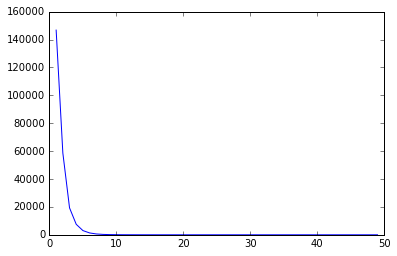

In [29]:
print "how often do people take a taxi during one day"
plt.plot(X,Y)
plt.show()

In [30]:

# Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [20]:
stamp = orders.Time
_datetime = pd.DatetimeIndex(stamp)
_tmp = _datetime.hour * 60 + _datetime.minute

In [21]:
orders['TimeId']=_tmp/10

In [33]:
orders.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time,start_id,dest_id,TimeId
0,dfc3f4b604681389e272339abee4d26a,b53d0620a01e247d31367ff4d00f4b06,3350e3a57d7282fce13ff2f342378231,b05379ac3f9b7d99370d443cfd5dcc28,929ec6c160e6f52c20a4217c7978f681,8.0,2016-01-08 19:53:17,37,7.0,119
1,1be15b4263fbf9b8e702d769ebb21a3d,17ba16f5a02c75568492ff5a9b156e0b,ca4e63fb666cb2b83f8d35591cc3bce9,2920ece99323b4c111d6f9affc7ea034,2407d482f0ffa22a947068f2551fe62c,26.6,2016-01-08 17:01:05,14,28.0,102
2,cf45a0da3ea8d2779e05ab196c9c6330,8addfe844ea56adf97098330d58dd1f8,d228849746f2d865fabc0faa9f4a2dfb,b05379ac3f9b7d99370d443cfd5dcc28,b05379ac3f9b7d99370d443cfd5dcc28,6.0,2016-01-08 21:26:55,37,37.0,128
3,08cfcf5e94eb520486797adda8936fae,5c7815e3b2c4339ea682265496ac175a,89271e615d70f1e81f9e39f1a827baf3,4725c39a5e5f4c188d382da3910b3f3f,905ac1f4c0f46a8d31ac4dc68cef54ca,24.0,2016-01-08 06:43:32,23,NaN,40
4,e7631f0d4c8dde0370c92e54a9ec65f9,31884e4855e61947dcd6a05e74dbbf26,c18d7e67ffbd5c7f657321e113ec759c,ca064c2682ca48c6a21de012e87c0df5,ca064c2682ca48c6a21de012e87c0df5,13.0,2016-01-08 07:34:58,42,42.0,45


In [34]:
# Then we will calculate the sum of usage times on the pieces of time() 
_s = {}
# _s['-1']=0

for i in _tmp/10:
    if _s.get(i)!=None:
        _s[i]+=1
    else:
        _s[i]=1
    
_s = DataFrame(_s,index = ['orderNum']).transpose()

In [35]:
# _s.plot(label='asf')
# plt.show()

In [36]:
# _s

In [37]:
# And then we also calculate the success times!
_success = {}
for i in range(0,size):
    if not orders['driver_id'].iloc[i]!=orders['driver_id'].iloc[i]:
        if _success.get(orders['TimeId'].iloc[i])==None:
            _success[orders['TimeId'].iloc[i]]=1
        else:
            _success[orders['TimeId'].iloc[i]]+=1
_success = DataFrame(_success,index=['success']).transpose()

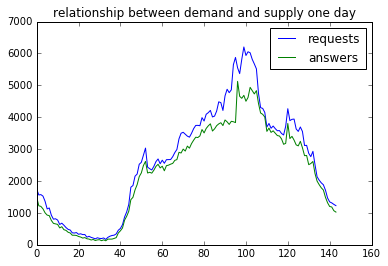

In [45]:
# _success.transpose().plot()
plt.title('relationship between demand and supply one day')
b = plt.plot(_s,label="requests")
a = plt.plot(_success,label="answers")

plt.legend()
plt.savefig(filename)
plt.show()

In [39]:
# plt.show?

25557
1


/home/breakpoint/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


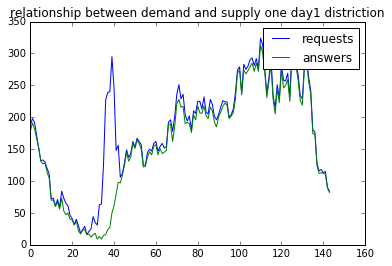

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:415,1#10:498,24:2324,25:1245,20:26394,22:1162,23:747,4:7387,8:166,5#3:2075,5#1:4648,8#2:7553,8#3:1743,8#4:2075,1#2:1909,1#1:498,1#6:83,1#5:8051,1#4:83,1#8:4814,14#10:498,4#1:830,7:6557,15#7:1826,15#6:2573,15#4:83,15#3:2822,15#2:1743,4#8:415,4#9:1577,4#6:415,4#7:249,4#5:3320,4#2:3486,4#3:1162,15#8:83,16#3:332,16#4:7221,16#5:166,17#1:83,16#9:249,17#3:83,17#2:12201,17#5:6225,17#4:3984,11#8:40836,13#8:6474,11#3:8798,13#4:36603,11#1:332,13#6:83,11#7:3901,11#6:18426,11#5:1577,11#4:43243,19#3:20418,19#2:332,19#1:830,19#4:3154,14#7:166,14#3:415,6:26145,4#10:2573,4#11:1494,4#13:1660,4#14:3154,1#11:3984,4#17:1328,4#18:996,3#1:1411,3#3:166,3#2:332,11:17347,15:3652,14:332,17:1411,16:5478,19:52041,6#1:3984,6#2:664,6#3:1660,6#4:83,2#12:12616,2#13:6640,2#10:1577,2#11:166,20#7:5893,20#6:664,20#5:3071,20#4:6889,20#2:4648,20#1:9296,16#12:3071,16#10:8134,16#11:6474,20#9:83,20#8:44073,23#2:166,23#3:415,23#5:581,22#1:1162,22#3:83,22#2:1660,22#5:83,22#4:913,22#6:166,25#8:1079,25#9:3984,25#2:83,25#1:83,25#6:166,25#7:1411,1:2739,5:83,24#3:1245,24#2:2905,24#1:59179,13#5:83,11#2:4731,2#8:83,2#4:83,2#5:332,2#6:2241,2#7:664,2#1:166,2#2:5229,2#3:747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


28912
51


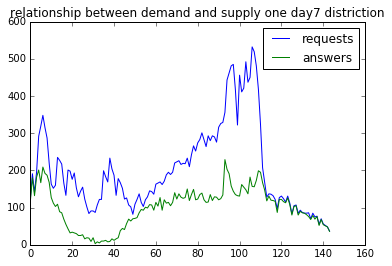

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
1#11:1577,1#10:83,24:1494,25:2988,20:13114,22:1328,23:5063,4:13363,8:1162,5#3:3486,5#1:8549,8#2:10624,8#3:14691,8#1:166,8#4:7470,8#5:83,1#3:996,1#2:1660,1#1:166,1#7:332,1#5:8715,1#4:664,1#9:249,1#8:3984,14#10:332,15#1:83,7:7221,15#7:2490,15#6:6225,15#4:415,15#3:10458,15#2:8217,4#8:249,4#9:3652,4#6:1411,4#7:2988,4#4:83,4#5:2739,4#2:3237,4#3:747,4#1:332,16#1:83,16#2:166,16#3:415,16#4:5976,17#3:249,17#2:7304,17#5:9960,17#4:1660,11#8:41832,13#8:17015,11#3:9545,11#2:10956,11#1:7968,11#7:3818,11#6:11371,11#5:8300,11#4:41334,19#3:134460,19#2:415,19#1:996,19#4:2241,15#8:83,14#6:3735,14#7:26311,14#4:83,14#3:830,6:20418,14#8:747,14#9:1245,14#1:249,4#10:5727,4#11:2158,4#12:166,4#13:1992,4#14:2158,4#16:498,4#17:4233,4#18:2656,3#1:1411,3#3:415,3#2:249,11:10873,15:10292,14:5478,17:996,16:6308,19:151641,6#1:2241,6#2:3984,6#3:83,6#4:1079,2#12:15106,2#13:5395,2#10:1162,2#11:332,20#7:8383,20#6:332,20#5:3071,20#4:10956,20#2:6806,20#1:6391,16#12:2822,16#10:25481,16#11:6806,20#8:34611,23#1:1162,23#2:249,23#3:1494,23#4:498,23#5:747,23#6:1494,22#1:1162,22#3:249,22#2:664,22#5:1660,22#4:1577,25#8:1660,25#9:2739,25#2:498,25#3:1079,25#1:249,25#6:830,25#7:1992,25#4:83,25#5:166,1:3735,5:332,24#3:2988,24#2:14691,24#1:184011,13#4:50713,2#8:166,2#4:83,2#5:913,2#6:18094,2#7:664,2#1:664


39208
8


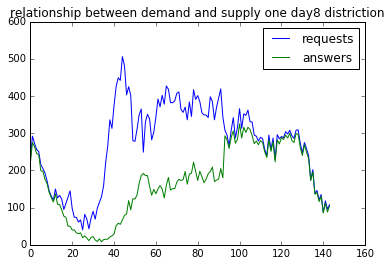

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:498,1#10:830,24:6308,25:4897,20:56440,22:2739,23:4980,4:22576,8:996,5#3:5727,5#2:83,5#1:8383,8#2:13446,8#3:5893,8#1:498,8#4:9628,1#3:249,1#2:1660,1#1:664,1#7:166,1#6:83,1#5:21082,1#4:415,1#9:83,1#8:11703,14#10:830,15#1:332,4#1:1494,7:13197,15#7:4316,15#6:6889,15#4:996,15#3:14193,15#2:8715,4#8:249,4#9:5478,4#6:996,4#7:1411,4#4:166,4#5:8881,4#2:5727,4#3:4233,15#8:249,16#1:166,16#2:581,16#3:747,16#4:8300,17#1:332,17#3:747,17#2:19747,17#5:24900,17#4:6557,11#8:60258,13#8:5976,11#3:13031,13#4:65321,11#1:3735,13#6:83,11#7:6142,11#6:29880,11#5:2324,11#4:70052,16#8:83,19#3:80676,19#2:1162,19#1:2407,19#4:2490,14#6:996,14#7:415,14#2:83,14#3:1245,6:16434,14#8:581,14#9:581,4#10:7636,4#11:7055,4#13:6889,4#14:4150,4#15:7,1#11:4980,4#17:3652,4#18:4980,3#1:2905,3#3:415,3#2:249,11:22161,15:14193,14:1909,17:2324,16:12616,19:145665,18:83,6#1:3486,6#2:2407,6#3:415,6#4:747,2#12:15687,2#13:4233,2#10:4399,2#11:996,20#7:27556,20#6:249,20#5:7055,20#4:10043,20#2:12782,20#1:15853,16#12:2822,16#10:24983,16#11:15936,20#9:83,20#8:103335,23#1:664,23#2:166,23#3:1079,23#4:830,23#5:2656,23#6:1660,22#1:1411,22#3:1494,22#2:3818,22#5:415,22#4:2490,25#8:2324,25#9:9130,25#3:913,25#1:83,25#6:581,25#7:4648,25#4:166,25#5:332,1:6142,5:747,24#3:2490,24#2:11122,24#1:240036,11#2:14193,2#4:664,2#5:2241


15572
12


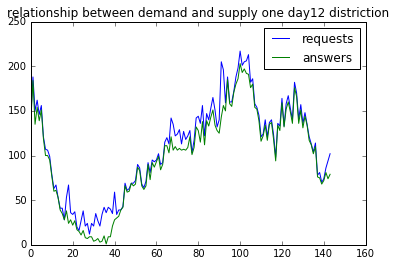

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
1#11:2241,1#10:249,24:1245,25:3652,20:33449,22:2324,23:913,4:13031,8:166,5#4:83,5#3:3569,5#2:83,5#1:4731,8#2:8798,8#3:5229,8#1:664,8#4:7387,8#5:83,1#3:498,1#2:2822,1#1:415,1#7:166,1#6:83,1#5:12367,1#4:249,1#9:166,1#8:4316,14#10:664,7:6640,15#7:1411,15#6:5644,15#4:249,15#3:11537,15#2:4150,4#8:747,4#9:2988,4#6:913,4#7:1743,4#4:166,4#5:4814,4#2:1328,4#3:1743,4#1:664,16#1:83,16#2:332,16#3:332,16#4:7968,17#1:249,16#9:332,17#3:498,17#2:12201,17#5:20999,17#4:3569,11#8:36188,13#8:1660,11#3:6640,11#2:7221,11#1:1992,11#7:2490,11#6:18924,11#5:2822,11#4:30544,19#3:27722,19#2:1245,19#1:1826,19#4:581,14#6:1909,14#7:1909,14#2:83,14#3:1245,6:8466,14#8:83,14#9:83,4#10:4067,4#11:3569,4#12:83,4#13:7387,4#14:2656,4#16:664,4#17:4150,4#18:4648,3#1:3652,3#3:166,3#2:166,11:10956,15:6059,14:4399,17:2988,16:7636,19:55859,6#1:1826,6#2:664,6#4:830,2#12:4648,2#13:249,2#10:2490,2#11:1826,20#7:11952,20#6:830,20#5:5561,20#4:11703,20#2:6557,20#1:8217,16#12:3818,16#10:15521,16#11:9711,20#8:118690,23#1:498,23#2:83,23#3:498,23#4:249,23#5:996,23#6:249,22#1:498,22#3:83,22#2:2324,22#5:913,22#4:1328,25#8:1909,25#9:6142,25#3:581,25#6:415,25#7:4980,25#5:249,1:4482,5:249,24#3:166,24#2:5727,24#1:133713,13#4:19173,2#8:166,2#4:249,2#5:1079,2#6:1245,2#7:1826,2#1:83,2#2:9213,2#3:415


13800
51


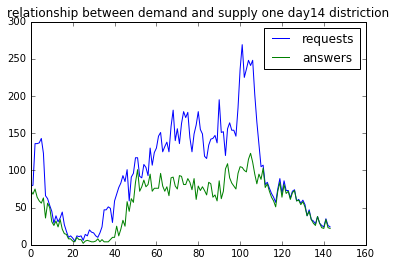

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
1#11:1328,24:581,25:1494,20:12782,22:2988,23:332,4:5478,8:166,5#4:83,5#3:1743,5#1:1826,8#2:3652,8#3:1660,8#1:83,8#4:2241,1#3:166,1#2:498,1#5:6557,1#4:83,1#9:166,1#8:2490,3:83,7:8300,15#7:1494,15#6:2490,15#4:249,15#3:5063,15#2:1411,4#8:83,4#9:1411,4#6:415,4#7:996,4#4:166,4#5:3486,4#2:2241,4#3:1328,4#1:664,16#2:83,16#3:332,16#4:4150,16#6:83,17#1:249,17#3:249,17#2:5063,17#5:5063,17#4:1162,11#8:17347,13#8:1577,11#3:2573,11#2:3071,11#1:2075,13#6:415,11#7:1245,11#6:5229,11#5:581,11#4:19090,19#3:8383,19#2:498,19#1:415,19#4:747,15#8:83,14#6:2075,14#7:5312,14#5:83,14#2:83,14#3:415,6:7885,14#8:249,14#9:415,4#10:2241,4#11:2158,4#12:249,4#13:1909,4#14:1909,4#16:498,4#17:2324,4#18:1494,3#1:664,3#3:166,3#2:332,11:6225,15:3320,14:2407,17:830,16:6723,19:24651,6#1:747,6#2:1328,6#3:249,6#4:415,2#12:1992,2#13:166,2#10:1494,2#11:249,20#7:13363,20#6:83,20#5:4399,20#4:2822,20#2:6059,20#1:4897,16#12:1660,16#10:9794,16#11:10043,20#8:21912,23#1:415,23#3:498,23#4:83,23#5:166,23#6:83,22#1:166,22#3:166,22#2:1411,22#5:415,22#4:830,25#8:1245,25#9:4233,25#2:83,25#3:473,25#1:83,25#6:166,25#7:1826,1:2490,5:415,24#3:332,24#2:2324,24#1:73953,13#4:17845,2#4:83,2#5:747,2#6:830,2#7:498,2#2:3237,21#2:415,21#1:83,NaN,NaN,NaN,NaN


10516
20


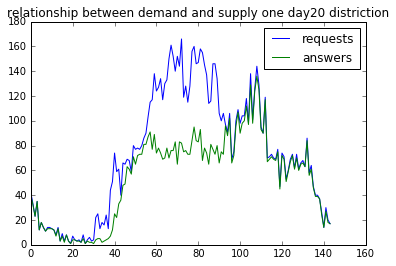

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:166,1#10:83,24:332,25:498,20:5893,22:2158,23:415,4:3320,5#4:166,5#3:83,5#1:913,8#2:2324,8#3:1079,8#1:83,8#4:1328,8#5:83,1#3:83,1#2:83,1#5:2241,1#4:83,1#9:166,1#8:1245,14#10:83,7:5976,15#7:498,15#6:1079,15#4:166,15#3:2407,15#2:830,4#8:166,4#9:249,4#6:332,4#7:415,4#5:1743,4#2:1162,4#1:415,16#2:166,16#3:332,16#4:3901,16#9:249,17#3:83,17#2:2324,17#5:2407,17#4:83,11#8:8300,13#8:664,11#3:332,11#2:913,11#1:415,11#7:415,11#6:3071,11#5:166,11#4:8881,19#3:8217,19#2:249,19#1:2075,19#4:3071,14#6:913,14#7:3071,14#2:83,14#3:166,6:3237,14#8:83,4#10:1162,4#11:996,4#13:747,4#14:1162,1#11:664,4#17:830,4#18:1162,3#1:3237,3#3:249,11:3901,15:1577,14:1743,17:166,16:2822,19:45401,6#1:332,6#2:166,6#4:332,2#12:1577,2#10:913,2#11:83,20#7:5976,20#6:249,20#5:1577,20#4:3486,20#2:1494,20#1:4067,16#12:1826,16#10:4897,16#11:5810,20#8:15604,23#3:415,23#5:332,23#6:83,22#1:498,22#3:1245,22#2:996,22#5:498,22#4:1411,22#6:166,25#8:498,25#9:2158,25#3:83,25#1:83,25#7:1245,1:498,5:166,24#3:166,24#2:1909,24#1:11039,13#4:5395,2#5:498,2#6:415,2#7:249,2#1:166,2#2:1328,21#2:83,21#1:166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


48867
23


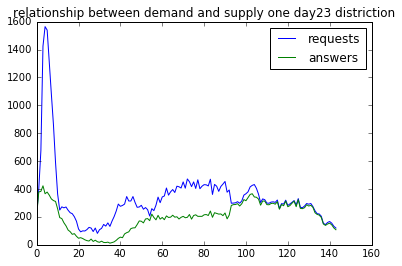

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:830,1#10:83,24:2241,25:5063,20:78020,22:7221,23:6391,4:27805,8:1494,5#3:5727,5#2:166,5#1:9877,8#2:14027,8#3:10043,8#1:581,8#4:8383,1#3:1411,1#2:3237,1#1:249,1#7:415,1#5:30378,1#4:581,1#8:16517,14#10:249,15#1:166,3:166,7:16683,15#7:7387,15#6:9047,15#4:1411,15#3:17015,15#2:8798,4#8:415,4#9:8964,4#6:3071,4#7:1411,4#4:581,4#5:6391,4#2:10458,4#3:3154,4#1:1826,16#1:83,16#3:1162,16#4:8134,16#6:83,17#1:166,16#9:166,17#3:581,17#2:21414,17#5:22493,17#4:7138,7#3:83,7#2:166,11#8:71380,13#8:3486,11#3:9379,11#2:6474,11#1:3237,13#6:498,11#7:7387,11#6:25481,11#5:2822,11#4:91300,19#3:89142,19#2:1162,19#1:1992,19#4:1162,15#8:83,14#6:166,14#7:498,14#2:249,14#3:1494,6:25813,14#8:166,14#9:166,4#10:8715,4#11:7304,4#12:415,4#13:4980,4#14:5395,1#11:5644,4#17:6225,4#18:5478,3#1:2739,3#3:581,3#2:249,11:29299,12:166,15:18758,14:747,17:3486,16:19090,19:142428,6#1:4482,6#2:2905,6#3:913,6#4:1079,2#12:13031,2#13:2573,2#10:4482,2#11:581,20#7:35607,20#6:415,20#5:8881,20#4:13280,20#2:17762,20#1:18841,16#12:3984,16#10:27556,16#11:14691,20#8:113129,23#1:83,23#2:249,23#3:913,23#4:830,23#5:1743,23#6:1660,22#1:1992,22#3:1826,22#2:5561,22#5:1577,22#4:15853,22#6:415,25#8:3569,25#9:12782,25#2:332,25#3:1826,25#1:83,25#6:664,25#7:4814,25#4:83,25#5:498,1:5395,5:747,24#3:1743,24#2:10043,24#1:257881,13#5:83


13992
24


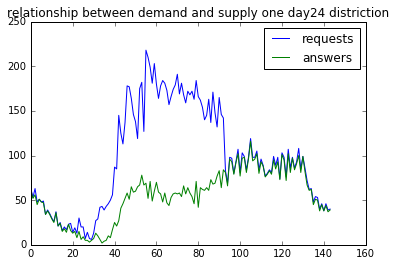

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:332,4#17:1494,24:1079,25:830,20:17845,22:4814,23:332,4:6225,8:166,5#3:1743,5#1:913,8#2:3735,8#3:830,8#1:83,8#4:1826,1#3:166,1#2:498,1#1:249,1#6:249,1#5:10043,1#4:83,1#8:2905,14#10:664,7:7387,15#7:747,15#6:1079,15#4:83,15#3:2656,15#2:1245,4#8:498,4#9:664,4#6:166,4#7:166,4#4:166,4#5:1992,4#2:3320,4#3:1743,4#1:415,16#3:581,16#4:3984,16#6:83,16#8:415,17#3:332,17#2:8300,17#5:6308,17#4:1079,11#8:25149,13#8:332,13#5:332,11#2:2075,11#1:249,13#6:166,11#7:2241,11#6:6723,11#5:581,11#4:24485,19#3:12284,19#2:249,19#1:3320,19#4:1245,14#6:249,14#2:249,14#3:415,6:6474,4#10:1162,4#11:1992,4#13:2822,4#14:1577,1#11:2075,1#10:83,4#18:1826,3#1:6225,3#3:83,3#2:166,11:7304,15:2739,14:83,17:1577,16:4150,19:40338,6#1:1162,6#2:83,2#12:4067,2#13:664,2#10:2656,2#11:249,20#7:15770,20#6:332,20#5:4565,20#4:5893,20#2:3818,20#1:10458,16#12:4233,16#10:5478,16#11:3569,20#8:41832,23#3:249,23#5:332,23#6:83,22#1:332,22#3:830,22#2:2324,22#5:1162,22#4:3652,25#8:747,25#9:5893,25#6:249,25#7:2905,1:1494,5:249,24#3:166,24#2:2324,24#1:51792,11#3:1909,13#4:9960,2#4:332,2#5:664,2#6:1079,2#7:581,2#1:83,2#2:5063,2#3:83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


19563
28


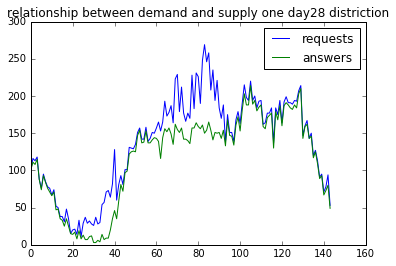

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:166,1#10:249,24:1245,25:1909,20:12865,22:2075,23:332,4:7304,8:332,5#4:83,5#3:2656,5#1:2407,8#2:4150,8#3:1909,8#1:166,8#4:3403,1#3:249,1#2:913,1#1:332,1#5:8134,1#4:332,1#8:3569,14#10:581,15#1:83,7:7553,15#7:1743,15#6:3237,15#4:83,15#3:3652,15#2:1328,4#8:415,4#9:2241,4#6:664,4#7:332,4#4:83,4#5:3320,4#2:1743,4#3:1577,4#1:498,16#1:83,16#4:4316,16#9:249,17#3:249,17#2:7221,17#5:8632,17#4:2158,11#8:24236,13#8:1245,11#3:6308,13#4:15438,11#1:581,13#6:166,11#7:1743,11#6:10790,11#5:1494,11#4:31955,19#3:10209,19#2:83,19#1:664,19#4:664,14#6:166,14#2:166,14#3:498,6:5644,4#10:2988,4#11:2739,4#13:5644,4#14:2407,1#11:830,4#17:1826,4#18:1079,3#1:2075,3#2:83,11:8964,15:3154,14:166,17:1660,16:7221,19:29133,18:83,6#1:415,6#2:83,6#3:1494,6#4:415,2#12:4316,2#13:581,2#10:1494,2#11:332,20#7:9047,20#6:415,20#5:4233,20#4:4731,20#3:3,20#2:4316,20#1:6474,16#12:1162,16#10:13778,16#11:7885,20#8:30627,23#1:166,23#2:332,23#3:415,23#5:581,23#6:166,22#1:747,22#3:747,22#2:2241,22#5:498,22#4:830,25#8:1162,25#9:4316,25#2:249,25#3:830,25#1:83,25#6:166,25#7:1660,25#5:83,1:1743,5:415,24#3:83,24#2:6391,24#1:57422,9#1#1:14,13#5:166,11#2:4814,2#8:249,2#4:498,2#5:332,2#6:415,2#7:249,2#1:415,2#2:5976,2#3:83,21#1:249,NaN,NaN,NaN,NaN


23155
8


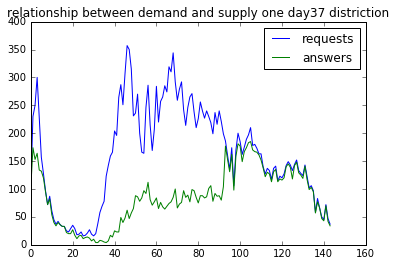

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:166,1#10:332,24:1411,25:1826,20:37433,22:2324,23:2241,4:9628,5#4:83,5#3:2739,5#1:3984,8#2:6474,8#3:3237,8#1:249,8#4:3818,1#3:83,1#2:1079,1#1:166,1#7:166,1#5:10458,1#4:249,1#9:83,1#8:2739,14#10:249,4#8:83,3:166,7:6640,15#7:1494,15#6:3154,15#4:249,15#3:4814,15#2:3320,15#1:83,4#9:1992,4#6:830,4#7:498,4#4:83,4#5:3403,4#2:1743,4#3:1577,4#1:747,16#3:581,16#4:4980,16#8:83,17#3:498,17#2:10375,17#5:11122,17#4:2573,11#8:33781,13#8:498,11#3:6557,13#4:18343,11#1:1826,13#6:83,11#7:3486,11#6:12782,11#5:1494,11#4:42828,17#1:83,19#3:21331,19#2:498,19#1:1411,19#4:2324,15#8:166,14#6:249,14#7:83,14#2:83,14#3:415,6:7221,14#8:83,14#9:166,4#10:3237,4#11:3486,4#12:83,4#13:2905,4#14:1909,1#11:2822,4#17:2075,4#18:2158,3#1:5644,3#3:166,3#2:249,11:13363,12:83,15:3735,14:249,17:1411,16:5312,19:72044,6#1:1743,6#2:747,6#3:996,6#4:166,2#12:7968,2#13:1577,2#10:2656,2#11:332,20#7:45982,20#6:415,20#5:3403,20#4:7802,20#2:6308,20#1:9130,16#12:3403,16#10:11371,16#11:10209,20#8:61005,23#1:166,23#3:332,23#4:83,23#5:664,22#1:830,22#3:1162,22#2:1909,22#5:83,22#4:1577,25#8:1909,25#9:5561,25#2:332,25#3:498,25#6:332,25#7:2490,25#5:249,1:2656,5:498,24#3:332,24#2:6723,24#1:77024,13#5:83,11#2:4482,2#4:166,2#5:913,2#6:3237,2#7:996,2#1:415,2#2:7387,2#3:332,21#1:83


17770
46


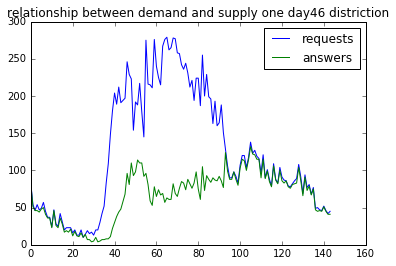

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:332,1#10:249,24:664,25:1494,20:17596,22:2490,23:498,4:5644,8:83,5#4:83,5#3:1909,5#1:3652,8#2:5810,8#3:664,8#1:83,8#4:2573,1#3:249,1#2:1328,1#1:166,1#7:83,1#5:7304,1#4:166,1#8:3154,14#10:83,3:83,7:5810,15#7:498,15#6:1494,15#5:83,15#4:83,15#3:2656,15#2:1328,4#8:332,4#9:2241,4#6:581,4#7:498,4#4:83,4#5:3486,4#2:2324,4#3:1162,4#1:415,16#3:166,16#4:4731,16#6:83,17#3:249,17#2:8798,17#5:6557,17#4:2822,7#2:83,11#8:31374,13#8:1162,11#3:5561,11#2:3569,11#1:332,13#6:498,11#7:2905,11#6:12865,11#5:1577,11#4:32785,19#3:16517,19#2:166,19#1:2739,19#4:3071,14#6:498,14#3:249,6:9130,14#8:83,4#10:1577,4#11:2075,4#13:2158,4#14:2656,1#11:1909,4#17:1826,4#18:1909,3#1:3818,3#3:83,3#2:166,11:13529,15:2324,14:83,17:2324,16:5146,19:52290,6#1:1079,6#2:996,6#3:415,6#4:664,2#12:4980,2#13:2241,2#10:1577,2#11:166,20#7:6889,20#5:2573,20#4:6972,20#2:3818,20#1:10043,16#12:1162,16#10:7968,16#11:5644,20#8:39010,23#1:332,23#3:498,23#5:249,22#1:747,22#3:166,22#2:1245,22#5:498,22#4:1245,22#6:166,25#8:830,25#9:5063,25#2:166,25#3:249,25#6:83,25#7:1162,1:2075,5:249,24#3:581,24#2:4648,24#1:38678,13#4:11039,2#4:249,2#5:415,2#6:747,2#7:747,2#1:83,2#2:4980,2#3:498,21#2:83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


24337
51


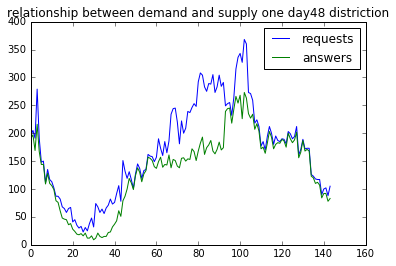

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:1079,1#10:166,24:7304,25:3652,20:154297,22:1826,23:3735,4:20501,8:664,5#4:83,5#3:3486,5#1:4316,8#2:14276,8#3:7304,8#1:581,8#4:9047,1#3:1411,1#2:1577,1#1:581,1#7:166,1#6:83,1#5:14193,1#4:581,1#8:6640,14#10:498,3:83,7:12284,15#7:4316,15#6:7885,15#4:747,15#3:12201,15#2:8051,15#1:83,4#9:4482,4#6:913,4#7:1245,4#4:332,4#5:5312,4#2:8134,4#3:1660,4#1:996,16#2:83,16#3:581,16#4:8383,17#1:166,16#9:581,17#3:415,17#2:11205,17#5:13363,17#4:4316,7#2:83,10#1:25,11#8:41417,13#8:14857,11#3:7304,11#2:4731,11#1:2324,13#6:166,11#7:2324,11#6:17430,11#5:498,11#4:52290,19#3:43658,19#2:1162,19#1:747,19#4:1660,15#8:166,14#6:747,14#7:166,14#2:166,14#3:1245,6:16766,14#8:166,4#10:6557,4#11:4565,4#12:83,4#13:5561,4#14:3403,1#11:2075,4#17:3735,4#18:3486,3#1:2490,3#3:415,3#2:249,11:14276,15:14608,14:664,17:2490,16:18011,19:96944,6#1:1992,6#2:1328,6#3:2573,6#4:1328,2#12:8964,2#13:913,2#10:2656,2#11:332,20#7:33200,20#6:830,20#5:9794,20#4:10043,20#2:10043,20#1:10375,16#12:2407,16#10:26975,16#11:10956,20#8:126077,23#1:83,23#2:83,23#3:1411,23#4:249,23#5:3237,23#6:664,22#1:1079,22#3:166,22#2:1909,22#5:498,22#4:996,25#8:1328,25#9:6640,25#2:83,25#3:913,25#1:83,25#6:830,25#7:3071,25#5:498,1:5312,5:249,24#3:1245,24#2:14110,24#1:290832,13#4:70716,2#4:581,2#5:1245,2#6:3569,2#7:747,2#1:249


112836
51


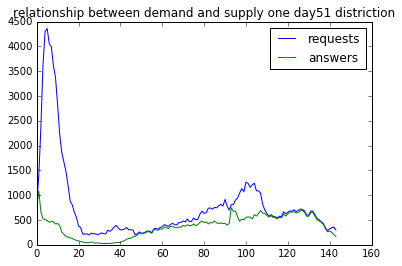

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:1577,1#10:332,24:3486,25:15272,20:197125,22:1162,23:13612,4:44903,8:3818,5#3:10292,5#1:10873,8#2:28718,8#3:33781,8#1:1245,8#4:23489,8#5:166,1#3:2988,1#2:6557,1#1:1079,1#7:747,1#5:36686,1#4:1411,1#9:166,1#8:19920,14#10:747,15#1:249,3:83,7:34860,15#7:12616,15#6:18924,15#5:249,15#4:2407,15#3:47144,15#2:30793,4#8:1079,4#9:8798,4#6:1079,4#7:6225,4#4:332,4#5:16102,4#2:11371,4#3:2822,4#1:1909,16#1:249,16#2:332,16#3:498,16#4:12782,16#6:249,17#1:913,16#9:415,17#3:1826,17#2:34030,17#5:47725,17#4:14857,7#2:166,11#8:98355,13#8:25730,11#3:32287,11#2:28967,11#1:11537,13#6:581,11#7:6889,11#6:58847,11#5:8300,11#4:132302,19#3:196793,19#2:1992,19#1:1660,19#4:664,15#8:332,14#6:4150,14#7:12699,14#2:498,14#3:3818,6:36437,14#8:2075,14#9:2739,4#10:12367,4#11:8051,4#12:498,4#13:7885,4#14:6557,1#11:5395,4#17:14027,4#18:7221,3#1:249,3#3:664,3#2:664,11:42496,15:28801,14:13446,17:6059,16:46397,19:301622,18:83,6#1:13529,6#2:5063,6#3:1577,6#4:4399,2#12:16600,2#13:1826,2#10:4150,2#11:996,20#7:29133,20#6:2822,20#5:12948,20#4:15272,20#2:26311,20#1:21497,16#12:2988,16#10:61669,16#11:26477,20#8:373002,23#1:1992,23#2:1826,23#3:3735,23#4:1245,23#5:3818,23#6:6391,22#1:1743,22#3:1660,22#2:1992,22#5:415,22#4:1079,25#8:12201,25#9:17679,25#2:1079,25#3:3818,25#1:332,25#6:2324,25#7:7055,25#4:415,25#5:664,1:10790,5:747,24#3:747,24#2:27888,24#1:461563


In [7]:
# images collections of demand and supply with respect to time


# 

cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])

filenameprefix = 'order_data_2016-01-0'
for i in range(1,22):
     if i<10:
        filename = filenameprefix+'0' + str(i)
    else:
        filename = filenameprefix + str(i)
        
    _orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
    dis={}
    for i in range(0,cluster.district_hash.size):
        dis[cluster.district_hash[i]]=cluster.district_id[i]
    start_id = []
    dest_id = []
    for i in range(0,_orders.index.size):
        start_id.append(dis[_orders.start_district_hash[i]])
        dest_id.append(dis.get(_orders.dest_district_hash[i]))
    _orders['start_id'] = Series(start_id)
    _orders['dest_id'] = Series(dest_id)
    district_size = cluster.index.size
    for j in range(1,67):
        
        orders = _orders[_orders.start_id==j]#given destination is distriction Num.3
        size = orders.index.size# if size is too small ,ignore it 
        if size<10000:
            continue
        print size
#         I want to get many example that it's dest_id = _max_k 
        _max = 0
        _max_k = 1
        for k in range(1,67):
            if _max<orders[orders.dest_id==k].size:
                _max = orders[orders.dest_id==k].size
                _max_k=k
        print _max_k
        district_hash = orders.iloc[0]['start_district_hash']
        
        stamp = orders.Time
        _datetime = pd.DatetimeIndex(stamp)
        _tmp = _datetime.hour * 60 + _datetime.minute
        orders['TimeId']=_tmp/10

        _s = {}

        for i in _tmp/10:
            if _s.get(i)!=None:
                _s[i]+=1
            else:
                _s[i]=1

        _s = DataFrame(_s,index = ['orderNum']).transpose()

        
        _success = {}
        for i in range(0,size):
            if not orders['driver_id'].iloc[i]!=orders['driver_id'].iloc[i]:
                if _success.get(orders['TimeId'].iloc[i])==None:
                    _success[orders['TimeId'].iloc[i]]=1
                else:
                    _success[orders['TimeId'].iloc[i]]+=1
        _success = DataFrame(_success,index=['success']).transpose()
        plt.figure(j)
        plt.title('relationship between demand and supply one day'+str(j)+' distriction')
        b = plt.plot(_s,label="requests")
        a = plt.plot(_success,label="answers")
        
        plt.legend()
#         plt.savefig('dest')
        plt.show()
#         print poi_data.loc[district_hash]
#         print district_hash
        display(poi_data.loc[district_hash])

        
#     print filename

In [67]:
poi_data.loc[district_hash].s

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
4#16:830,1#10:83,24:2241,25:5063,20:78020,22:7221,23:6391,4:27805,8:1494,5#3:5727,5#2:166,5#1:9877,8#2:14027,8#3:10043,8#1:581,8#4:8383,1#3:1411,1#2:3237,1#1:249,1#7:415,1#5:30378,1#4:581,1#8:16517,14#10:249,15#1:166,3:166,7:16683,15#7:7387,15#6:9047,15#4:1411,15#3:17015,15#2:8798,4#8:415,4#9:8964,4#6:3071,4#7:1411,4#4:581,4#5:6391,4#2:10458,4#3:3154,4#1:1826,16#1:83,16#3:1162,16#4:8134,16#6:83,17#1:166,16#9:166,17#3:581,17#2:21414,17#5:22493,17#4:7138,7#3:83,7#2:166,11#8:71380,13#8:3486,11#3:9379,11#2:6474,11#1:3237,13#6:498,11#7:7387,11#6:25481,11#5:2822,11#4:91300,19#3:89142,19#2:1162,19#1:1992,19#4:1162,15#8:83,14#6:166,14#7:498,14#2:249,14#3:1494,6:25813,14#8:166,14#9:166,4#10:8715,4#11:7304,4#12:415,4#13:4980,4#14:5395,1#11:5644,4#17:6225,4#18:5478,3#1:2739,3#3:581,3#2:249,11:29299,12:166,15:18758,14:747,17:3486,16:19090,19:142428,6#1:4482,6#2:2905,6#3:913,6#4:1079,2#12:13031,2#13:2573,2#10:4482,2#11:581,20#7:35607,20#6:415,20#5:8881,20#4:13280,20#2:17762,20#1:18841,16#12:3984,16#10:27556,16#11:14691,20#8:113129,23#1:83,23#2:249,23#3:913,23#4:830,23#5:1743,23#6:1660,22#1:1992,22#3:1826,22#2:5561,22#5:1577,22#4:15853,22#6:415,25#8:3569,25#9:12782,25#2:332,25#3:1826,25#1:83,25#6:664,25#7:4814,25#4:83,25#5:498,1:5395,5:747,24#3:1743,24#2:10043,24#1:257881,13#5:83


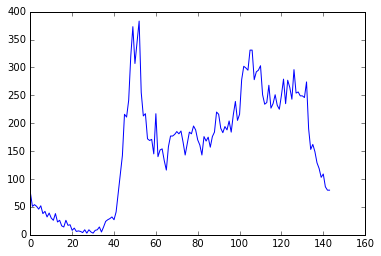

In [32]:
# the same as time ,we should consider the district reaction
# figure out demand and supply with respect to district

# when start_id = 1 first
# for i in range(0,size):
# distriction = {}

# distriction['1'] = orders[orders.start_id==1]
# TimeId = distriction['1']['TimeId']
# # TimeId
# _s1 = {}
# for i in TimeId:
#     if _s1.get(i)!=None:
#         _s1[i]+=1
#     else:
#         _s1[i]=1
# _s1 = DataFrame(_s1,index = ['orderNum']).transpose()
# plt.plot(_s1)

In [23]:
# Then we will analysis relationship between weather and the number of orders
weather = pd.read_table('./season_1/training_data/weather_data/weather_data_2016-01-01', names=['Time','Weather','temperature','PM2.5'])

In [24]:
weather.head()

,Time,Weather,temperature,PM2.5
0,2016-01-01 00:00:28,1,4.0,177
1,2016-01-01 00:05:24,1,3.0,177
2,2016-01-01 00:10:08,1,3.0,177
3,2016-01-01 00:15:27,1,3.0,177
4,2016-01-01 00:20:06,1,3.0,177


In [49]:
def convertTime(dataFrame):
    stamp = dataFrame.Time
    datetime = pd.DatetimeIndex(stamp)
    tmp = datetime.hour * 60 + datetime.minute
    dataFrame['TimeId']=tmp/10


In [36]:
convertTime(weather)
weather.head()

,Time,Weather,temperature,PM2.5,TimeId
0,2016-01-01 00:00:28,1,4.0,177,0
1,2016-01-01 00:05:24,1,3.0,177,0
2,2016-01-01 00:10:08,1,3.0,177,1
3,2016-01-01 00:15:27,1,3.0,177,1
4,2016-01-01 00:20:06,1,3.0,177,2


In [22]:
# weather

In [38]:
cluster.head()

,district_hash,district_id
0,90c5a34f06ac86aee0fd70e2adce7d8a,1
1,f2c8c4bb99e6377d21de71275afd6cd2,2
2,58c7a4888306d8ff3a641d1c0feccbe3,3
3,b26a240205c852804ff8758628c0a86a,4
4,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,5


In [39]:
cluster[cluster.district_hash=='90c5a34f06ac86aee0fd70e2adce7d8a']

,district_hash,district_id
0,90c5a34f06ac86aee0fd70e2adce7d8a,1


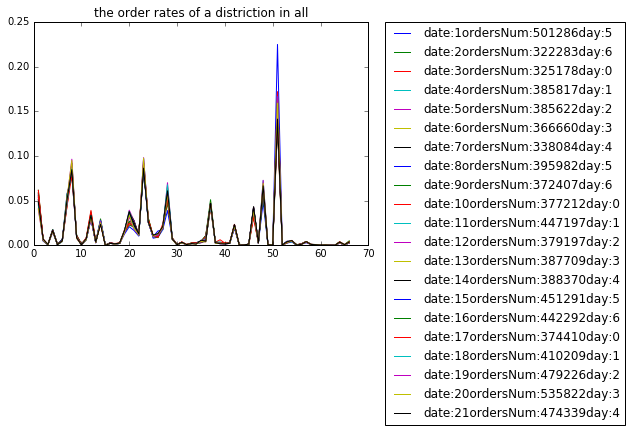

In [39]:
# I think that the order rates of a distriction in all just a constant value
# so just valiad it by figures

cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])
path = './season_1/training_data/order_data/'
filenameprefix = 'order_data_2016-01-'
for i in range(1,22):
    if i<10:
        filename = filenameprefix+'0' + str(i)
    else:
        filename = filenameprefix + str(i)
    _orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
    dis={}
    for k in range(0,cluster.district_hash.size):
        dis[cluster.district_hash[k]]=cluster.district_id[k]
    start_id = []
    dest_id = []
    for k in range(0,_orders.index.size):
        start_id.append(dis[_orders.start_district_hash[k]])
        dest_id.append(dis.get(_orders.dest_district_hash[k]))
    _orders['start_id'] = Series(start_id)
    _orders['dest_id'] = Series(dest_id)
    district_size = cluster.index.size
    rates = {}
    for j in range(1,67):
        sizeAll =_orders.index.size
        orders = _orders[_orders.start_id==j]#given destination is distriction Num.3
        rates[j]=float(orders.index.size)/sizeAll
#     print rates
#     rates = DataFrame(rates,index = ['rates'])
    plt.plot(rates.keys(),rates.values(),label = 'date:'+str(i)+'ordersNum:'+str(k)+'day:'+str((i+4)%7))
plt.title('the order rates of a distriction in all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.savefig('the orders rates of a distriction in all')
plt.show()


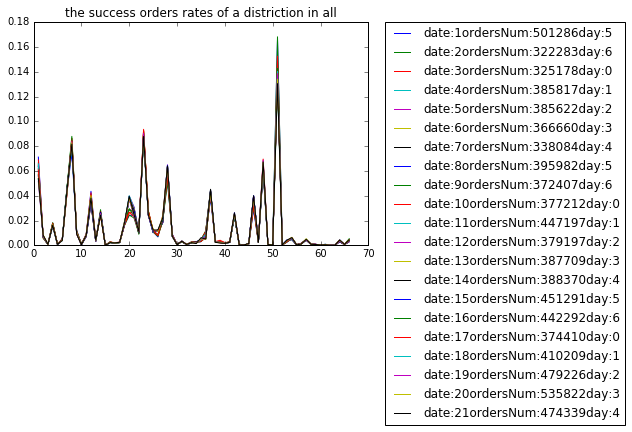

In [42]:
# the same as above,we will caculate supply with respect to distriction

cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])
path = './season_1/training_data/order_data/'
filenameprefix = 'order_data_2016-01-'
for i in range(1,22):
    if i<10:
        filename = filenameprefix+'0' + str(i)
    else:
        filename = filenameprefix + str(i)
    _orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
    dis={}
    for k in range(0,cluster.district_hash.size):
        dis[cluster.district_hash[k]]=cluster.district_id[k]
    start_id = []
    dest_id = []
    for k in range(0,_orders.index.size):
        start_id.append(dis[_orders.start_district_hash[k]])
        dest_id.append(dis.get(_orders.dest_district_hash[k]))
    _orders['start_id'] = Series(start_id)
    _orders['dest_id'] = Series(dest_id)
    district_size = cluster.index.size
    successOrdersAll = _orders[_orders['driver_id']==_orders['driver_id']]#all success orders
    successSizeAll =successOrdersAll.index.size
    rates = {}
    for j in range(1,67):
#         sizeAll =_orders.index.size
        orders = successOrdersAll[successOrdersAll.start_id==j]#given destination is distriction Num.3
        successSize = orders.index.size
        rates[j]=float(successSize)/successSizeAll
#     print rates
#     rates = DataFrame(rates,index = ['rates'])
    plt.plot(rates.keys(),rates.values(),label = 'date:'+str(i)+'ordersNum:'+str(k)+'day:'+str((i+4)%7))
plt.title('the success orders rates of a distriction in all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.savefig('the success orders rates of a distriction in all')
plt.show()

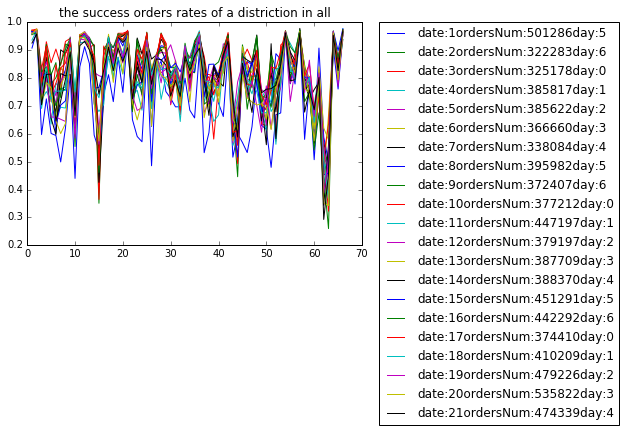

In [44]:
# Then I want to know the success rate in all districtions
# the same as above,we will caculate supply with respect to distriction

cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])
path = './season_1/training_data/order_data/'
filenameprefix = 'order_data_2016-01-'
for i in range(1,22):
    if i<10:
        filename = filenameprefix+'0' + str(i)
    else:
        filename = filenameprefix + str(i)
    _orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
    dis={}
    for k in range(0,cluster.district_hash.size):
        dis[cluster.district_hash[k]]=cluster.district_id[k]
    start_id = []
    dest_id = []
    for k in range(0,_orders.index.size):
        start_id.append(dis[_orders.start_district_hash[k]])
        dest_id.append(dis.get(_orders.dest_district_hash[k]))
    _orders['start_id'] = Series(start_id)
    _orders['dest_id'] = Series(dest_id)
    district_size = cluster.index.size
#     successOrdersAll = _orders[_orders['driver_id']==_orders['driver_id']]#all success orders
#     successSizeAll =successOrdersAll.index.size
    rates = {}
    for j in range(1,67):
#         sizeAll =_orders.index.size
        orders =_orders[_orders.start_id==j] #given destination is distriction Num.3
        sizeAll = orders.index.size
        successSize = orders[orders['driver_id']==orders['driver_id']].index.size
        rates[j]=float(successSize)/sizeAll
#     print rates
#     rates = DataFrame(rates,index = ['rates'])
    plt.plot(rates.keys(),rates.values(),label = 'date:'+str(i)+'ordersNum:'+str(k)+'day:'+str((i+4)%7))
plt.title('the success orders rates of a distriction in all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.savefig('the successrates of a distriction in all days')
plt.show()

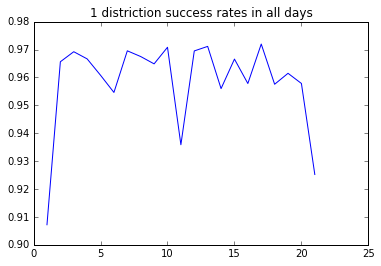

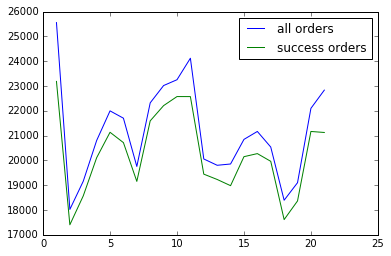

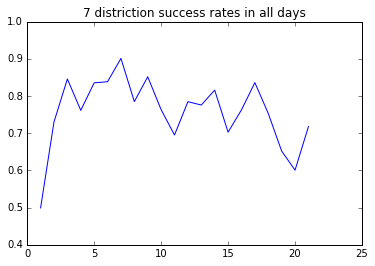

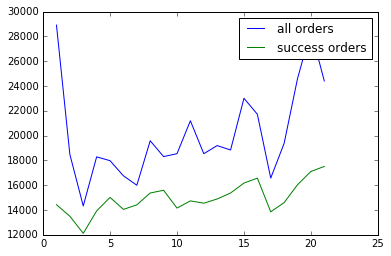

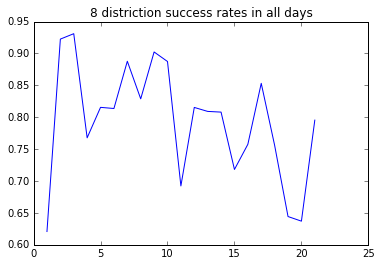

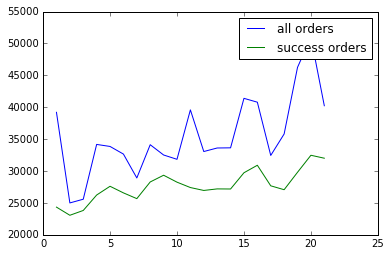

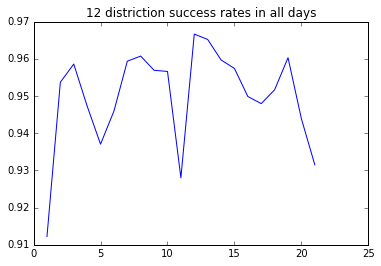

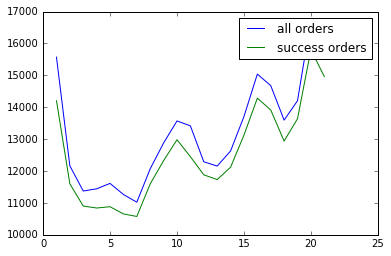

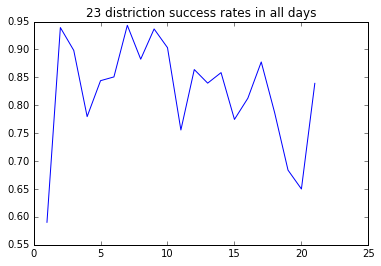

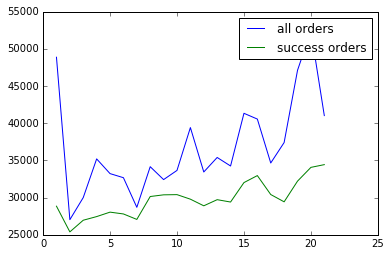

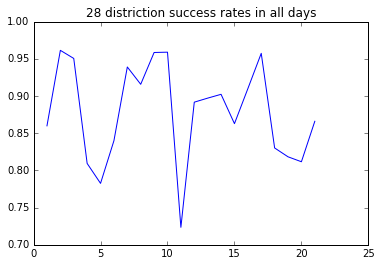

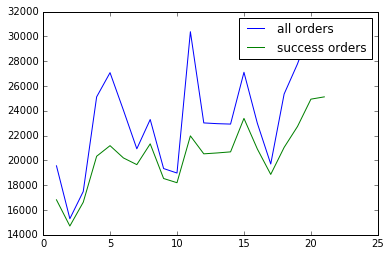

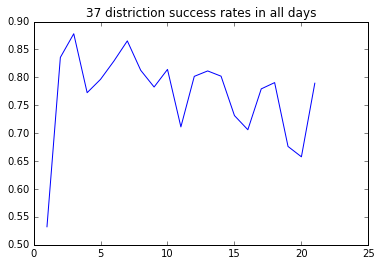

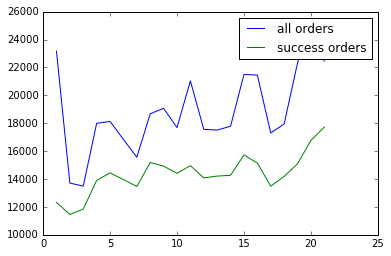

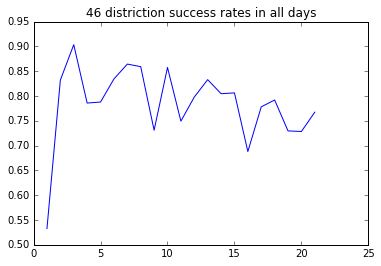

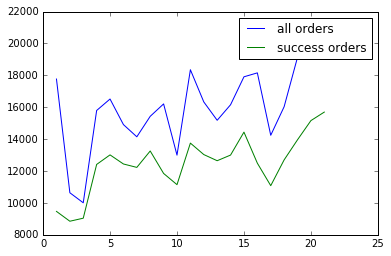

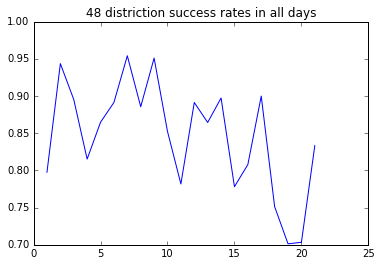

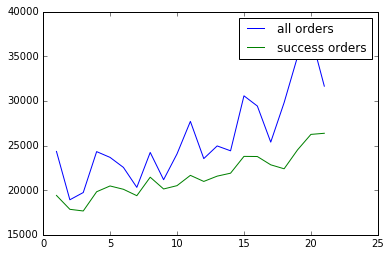

In [48]:
# I want to get the succcess rates of a distriction's orders  in all days
# for example I just set distriction_id  to  51.
cluster = pd.read_table('./season_1/training_data/cluster_map/cluster_map', names=['district_hash','district_id'])
poi_data = pd.read_table('./season_1/training_data/poi_data/poi_data',names=['district_hash','poi_class'])
path = './season_1/training_data/order_data/'
filenameprefix = 'order_data_2016-01-'

for j in [1,7,8,12,23,28,37,46,48]:
    allOrders={}
    successOrders={}
    rates = {}
    for i in range(1,22):
        if i<10:
            filename = filenameprefix+'0' + str(i)
        else:
            filename = filenameprefix + str(i)
        _orders = pd.read_table(path+filename, names=['order_id', 'driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
        dis={}
        for k in range(0,cluster.district_hash.size):
            dis[cluster.district_hash[k]]=cluster.district_id[k]
        start_id = []
        dest_id = []
        for k in range(0,_orders.index.size):
            start_id.append(dis[_orders.start_district_hash[k]])
            dest_id.append(dis.get(_orders.dest_district_hash[k]))
        _orders['start_id'] = Series(start_id)
        _orders['dest_id'] = Series(dest_id)
        district_size = cluster.index.size
        orders = _orders[_orders['start_id']==j]# set it to 51
        sizeAll = orders.index.size
        sizeSuccess = orders[orders['driver_id']==orders['driver_id']].index.size
        rates[i]=float(sizeSuccess)/sizeAll
        allOrders[i]=sizeAll
        successOrders[i]=sizeSuccess
    plt.figure(1)
    plt.plot(rates.keys(),rates.values())
    plt.title(str(j)+' distriction success rates in all days')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
    plt.savefig(str(j)+' distriction success rates in all days')
    plt.figure(2)
    plt.plot(allOrders.keys(),allOrders.values(),label='all orders')
    plt.plot(successOrders.keys(),successOrders.values(),label='success orders')
    plt.legend()
    plt.savefig(str(j)+' distriction success orders and all orders in all days')
    plt.show()

# some analysis about some figures above
## 一般而言，更多的订单，就会有更多的接单，但是接单率会稍有下降，可能是由于车多拥堵导致的接单效率的下降。
## 